## <div align=center>Linear Regression</div> ##

**Loading the data and libraries**

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (16,9)

In [3]:
data = pd.read_csv("data.csv")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


**Visualize the data**

Text(0.5, 1.0, 'Profit vs City Population')

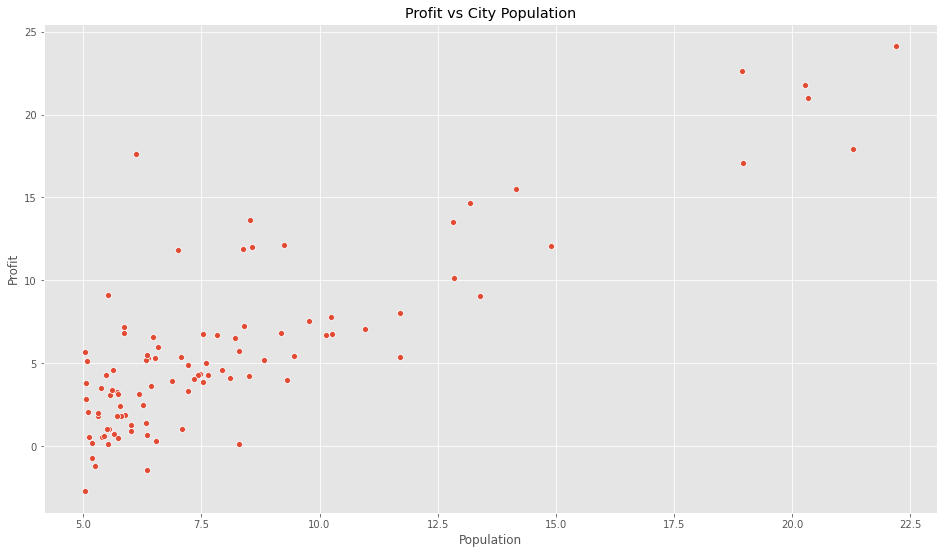

In [5]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit vs City Population")

In [6]:
population = data.Population.values
profit = data.Profit.values

**Standardisation**

Standardisation refers to the process of subtracting the mean and dividing by the standard deviation.

<br>
$$Z = \frac{x-\mu}{\sigma}$$

In [7]:
#Standardisation
mean_population = np.mean(population, axis=0)
std_population = np.std(population, axis=0)

population = (population - mean_population) / std_population

mean_profit = np.mean(profit, axis=0)
std_profit = np.std(profit, axis=0)

profit = (profit - mean_profit) / std_profit

m = data.Population.values.size
X = np.append(np.ones((m,1)), population.reshape(m,1), axis=1)
y = profit.reshape(m,1)
omega = np.zeros((2,1))

**Compute the Cost** $J(\omega)$

The objective of linear regression is to minimize the cost function.

<br>
$$J(\omega) = \frac{1}{m} \sum_{i=1}^{m}(h_ω (x_i )-y_i)^2$$
<br>

where $h_\omega(x)$ is the hypothesis and given by the linear model

<br>
$$h_\omega(x) = \omega_0 + \omega_1 x$$

In [8]:
def cost_function(X, y, omega):
    m=len(y)
    y_pred = X.dot(omega)
    error = (y_pred - y)**2
    return 1 / m * np.sum(error)

**Gradient Descent**

Minimize the cost function $J(\omega)$ by updating the below equation and repeat until convergence

<br>
$$\omega:  = \omega_1 - \alpha \frac{2}{m} \sum_{i=1}^{m} (h_{\omega}(x_i) - y_i)x_i$$

In [9]:
def gradient_descent(X, y, omega, alpha, epochs):
    m = len(y)
    costs = []
    
    for i in range(epochs):
        y_pred = X.dot(omega)
        error = np.dot(X.transpose(), (y_pred - y))
        omega -= alpha * 2/m * error
        costs.append(cost_function(X, y, omega))
        
    return omega, costs
    

In [10]:
omega, costs = gradient_descent(X, y, omega, alpha=0.01, epochs=200)

print("h(x) = {} + {}x".format(str(round(omega[0,0],2)), str(round(omega[1,0], 2))))

h(x) = -0.0 + 0.82x


In [11]:
costs[-1]

0.2981856097543731

**Visualising the Cost function** $J(\omega)$

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
omega_0 = np.linspace(-10, 10, 100)
omega_1 = np.linspace(-10, 10, 100)

cost_values = np.zeros((len(omega_0), len(omega_1)))

for i in range(len(omega_0)):
    for j in range (len(omega_1)):
        w = np.array([omega_0[i], omega_1[j]])
        cost_values[i, j] = cost_function(X, y, w)

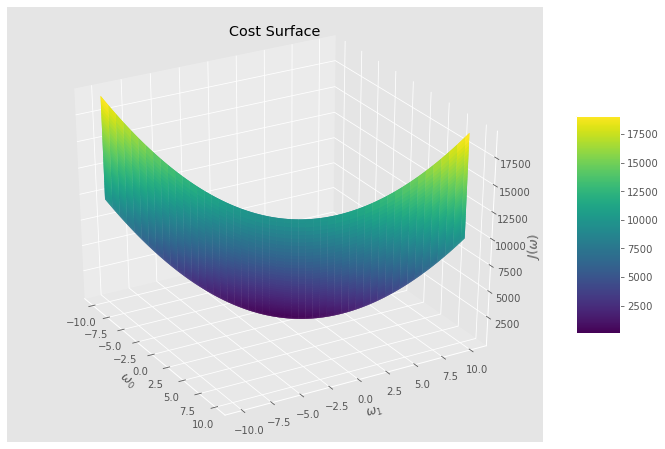

In [14]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(omega_0, omega_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\omega_0$")
plt.ylabel("$\omega_1$")
ax.set_zlabel("$J(\omega)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

**Plotting the Convergence**

Plot $J(\omega)$ against the number of iteration of gradient descent.

Text(0.5, 1.0, 'Values of Cost function over iterations of Gradient Descent')

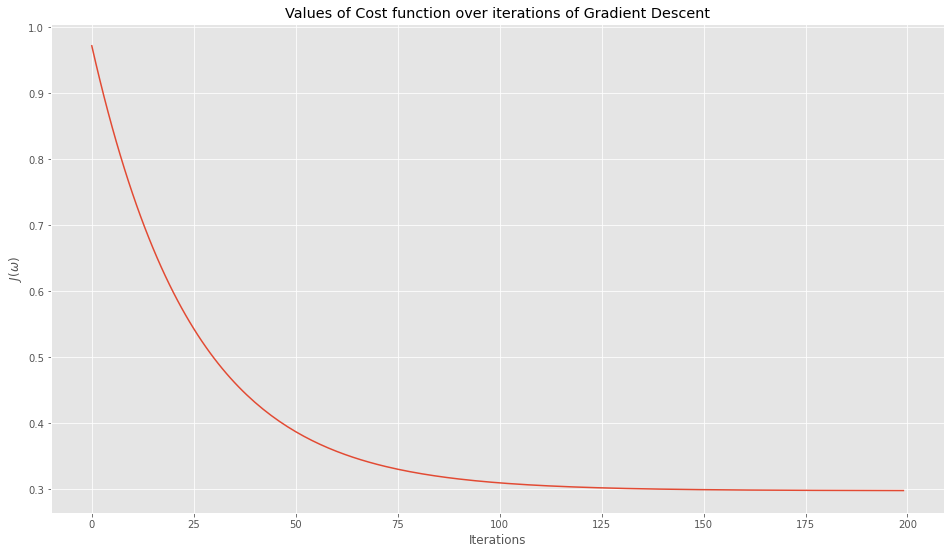

In [15]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\omega)$")
plt.title("Values of Cost function over iterations of Gradient Descent")

**Training data with Linear Regression Fit**

In [16]:
omega

array([[-3.88967209e-16],
       [ 8.23136763e-01]])

Text(0.5, 1.0, 'Linear Regression Fit')

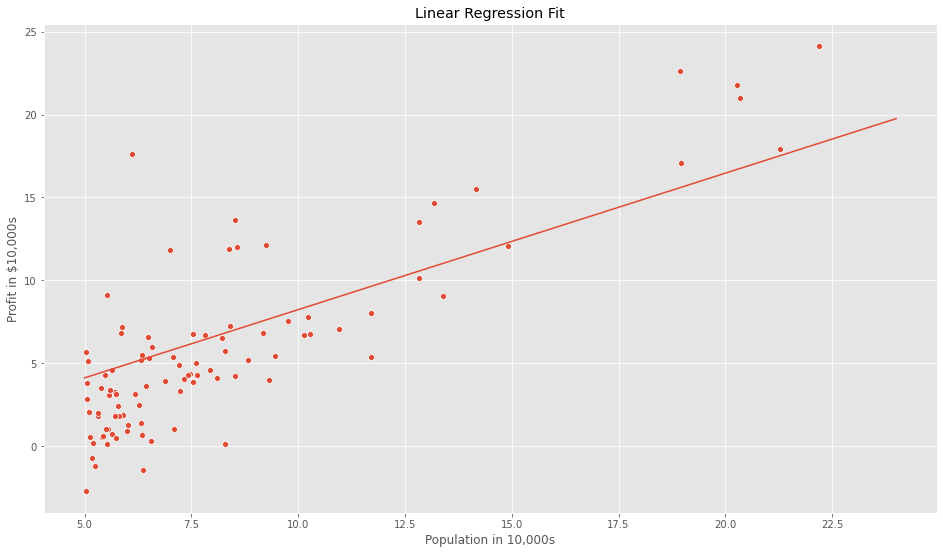

In [17]:
omega = np.squeeze(omega)
sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5,25)]
y_value = [(x * omega[1] + omega[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")

<div></div>

$h_\omega(x) = \omega_0 + \omega_1 x$ 

In [18]:
def predict(x, omega):
    y_pred = np.dot(omega.transpose(), x)
    return y_pred

In [19]:
y_pred = predict(np.array([1,2]), omega) * 10000

print("For a population of 20,000, the model predicts a profit of $" + str(round(y_pred, 0)))

For a population of 20,000, the model predicts a profit of $16463.0
